In [1]:
import requests

In [2]:
url = 'https://www.naver.com'

In [4]:
response = requests.get(url) #get 방식으로 해당 url로 request 보내고 response 받아서 리턴
response                      # response 200 -> 정상적인 리턴 값

<Response [200]>

In [5]:
from bs4 import BeautifulSoup

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
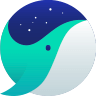
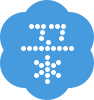

In [6]:
response.text

In [7]:
dom = BeautifulSoup(response.text,'html.parser')


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
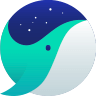
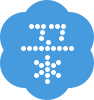

In [8]:
dom

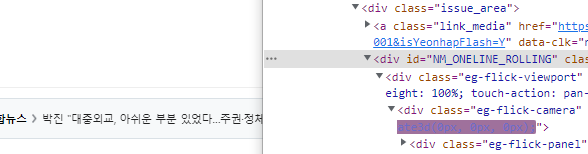

In [11]:
elements = dom.select('#NM_ONELINE_ROLLING .issue') # 네이버 뉴스 부분 크롤링
len(elements)   #elements의 길이는 10

10

In [12]:
elements # 10개의 기사제목이 crawling됨

[<a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013148720">'검수완박 1차 입법' 검찰청법, 고성·항의 속 본회의 통과</a>,
 <a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013148558">'검수완박' 주말 본회의…욕설·삿대질·육탄전에 아수라장</a>,
 <a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013148616">검찰 "역사상 큰 오점…대통령·국회의장, 검찰청법 숙고해달라"</a>,
 <a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013148694">尹당선인, 대통령실 인선·국정과제 보고 받고 주말 숙고</a>,
 <a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&

In [13]:
elements[0] #인덱싱으로 특정기사제목 특정

<a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013148720">'검수완박 1차 입법' 검찰청법, 고성·항의 속 본회의 통과</a>

In [14]:
elements[0].text.strip() # text 부분을 양옆을 자르고 크롤링

"'검수완박 1차 입법' 검찰청법, 고성·항의 속 본회의 통과"

In [15]:
elements[0].attrs['href'].strip()  # a태그안의 href 크롤링

'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0013148720'

In [19]:
result=[
    {
        '뉴스' : element.text.strip(),
        'URL' : element.attrs['href'].strip()
    }
    for element in elements
]
result  #반복 할때는 인덱싱 따로 지정 안해도됨

[{'뉴스': "'검수완박 1차 입법' 검찰청법, 고성·항의 속 본회의 통과",
  'URL': 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0013148720'},
 {'뉴스': "'검수완박' 주말 본회의…욕설·삿대질·육탄전에 아수라장",
  'URL': 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0013148558'},
 {'뉴스': '검찰 "역사상 큰 오점…대통령·국회의장, 검찰청법 숙고해달라"',
  'URL': 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0013148616'},
 {'뉴스': '尹당선인, 대통령실 인선·국정과제 보고 받고 주말 숙고',
  'URL': 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0013148694'},
 {'뉴스': '국회 산자중기위, 9일 이창양·11일 이영 인사청문회',
  'URL': 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0013148721'},
 {'뉴스': '박진 "대중외교, 아쉬운 부분 있었다…주권·정체성엔 단호해야"',
  'URL': 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeo

In [20]:
import time
import os

In [21]:
now = time.strftime('%Y%m%d%H%H%M%S')
now # 날짜 형식 숙지

'2022043023230338'

In [22]:
filename = f'네이버뉴스이슈{now}.txt' #지금시간으로 이름 저장
filename

'네이버뉴스이슈2022043023230338.txt'

In [23]:
os.getcwd() #현재 실행되는 경로

'C:\\DevRoot\\Dropbox\\Py30\\daily_code\\22.04'

In [24]:
filepath = os.path.exists('out')

In [25]:
if not os.path.exists('out'):  #만약 현재경로에 out이라는 폴더가 없으면 out이라는 폴더 생성
    os.makedirs('out')

In [26]:
filepath = os.path.join(os.getcwd(),'out',filename)
filepath

'C:\\DevRoot\\Dropbox\\Py30\\daily_code\\22.04\\out\\네이버뉴스이슈2022043023230338.txt'

In [27]:
with open(filepath,'wt',encoding='utf-8') as f:
    for data in result:
        f.write(data['뉴스'] + '\t' +data['URL'] + '\n')

In [33]:
import pandas as pd

In [34]:
df = pd.DataFrame(result)  #데이터프레임에 저장
df

,뉴스,URL
0,"'검수완박 1차 입법' 검찰청법, 고성·항의 속 본회의 통과",https://news.naver.com/main/list.naver?mode=LP...
1,'검수완박' 주말 본회의…욕설·삿대질·육탄전에 아수라장,https://news.naver.com/main/list.naver?mode=LP...
2,"검찰 ""역사상 큰 오점…대통령·국회의장, 검찰청법 숙고해달라""",https://news.naver.com/main/list.naver?mode=LP...
3,"尹당선인, 대통령실 인선·국정과제 보고 받고 주말 숙고",https://news.naver.com/main/list.naver?mode=LP...
4,"국회 산자중기위, 9일 이창양·11일 이영 인사청문회",https://news.naver.com/main/list.naver?mode=LP...
5,"박진 ""대중외교, 아쉬운 부분 있었다…주권·정체성엔 단호해야""",https://news.naver.com/main/list.naver?mode=LP...
6,"'614억 횡령' 우리은행 직원 구속…경찰, 동생도 영장 신청",https://news.naver.com/main/list.naver?mode=LP...
7,"'계곡살인' 이은해·조현수 조력자 2명 구속…""도주 우려""",https://news.naver.com/main/list.naver?mode=LP...
8,"이준석 ""실외마스크 해제 타당성 있어""…安인수위에 일침",https://news.naver.com/main/list.naver?mode=LP...
9,부처님오신날 연등회 3년만에 열려…풍성한 행사 속 시민 북적,https://news.naver.com/main/list.naver?mode=LP...


In [35]:
filepath = os.path.join(os.getcwd(),'out',f'네이버뉴스이슈{now}.xlsx')
filepath

'C:\\DevRoot\\Dropbox\\Py30\\daily_code\\22.04\\out\\네이버뉴스이슈2022043023230338.xlsx'

In [36]:
df.to_excel(filepath, encoding='utf-8')

(1050, "Table 'naver_news_issue' already exists")
mysql에러코드: 1050
mysql에러메세지: Table 'naver_news_issue' already exists
